In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()


········


In [19]:


connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title AS 'film_title', COUNT(r.rental_date)
FROM sakila.film f
JOIN sakila.inventory i USING(film_id)
JOIN sakila.rental r USING(inventory_id)
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
WHERE r.rental_date LIKE '%%2005-08%%'
GROUP BY f.title
ORDER BY f.title;'''

data = pd.read_sql_query(query, engine)
data.head()


,film_title,COUNT(r.rental_date)
0,ACADEMY DINOSAUR,9
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,6
3,AFFAIR PREJUDICE,6
4,AFRICAN EGG,3


In [3]:
data.shape

(1156, 13)

In [20]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query_features = '''SELECT f.title AS 'film_title', f.rental_rate, f.rental_duration, f.length, f.rating, f.special_features, c.name AS 'category'
FROM sakila.film f
JOIN sakila.film_category fc USING(film_id)
JOIN sakila.category c USING(category_id)
ORDER BY title;'''

data_features = pd.read_sql_query(query_features, engine)
data_features.head()
data_features.shape


(1000, 7)

In [21]:

data_features.head()

,film_title,rental_rate,rental_duration,length,rating,special_features,category
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family


In [22]:

data_features['rented_aug'] = 0
data_features.head()



,film_title,rental_rate,rental_duration,length,rating,special_features,category,rented_aug
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,0
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror,0
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary,0
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror,0
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family,0


In [23]:


data_film = data['film_title']
film = []
for title in data['film_title']:
    film.append(title)



In [24]:

features_film = data_features['film_title']
features_film = []
for title in data_features['film_title']:
    features_film.append(title)


In [25]:


new_film = [x for x in features_film if x not in film]
pd_new_film = pd.DataFrame(new_film)
pd_new_film['count'] = 0
pd_new_film.head()
pd_new_film['film_title'] = pd_new_film[0]
pd_new_film['COUNT(r.rental_date)'] = pd_new_film['count'] 
pd_new_film = pd_new_film.drop([0,'count'],axis=1)


In [26]:

pd_new_film.rename(columns={'film_title':'title'})


,title,COUNT(r.rental_date)
0,ALICE FANTASIA,0
1,APOLLO TEEN,0
2,ARGONAUTS TOWN,0
3,ARK RIDGEMONT,0
4,ARSENIC INDEPENDENCE,0
5,BOONDOCK BALLROOM,0
6,BUTCH PANTHER,0
7,CATCH AMISTAD,0
8,CHINATOWN GLADIATOR,0
9,CHOCOLATE DUCK,0


In [27]:

new_data = pd.concat([pd_new_film,data],axis=0)
new_data = new_data.sort_values(by=['film_title'])
new_data = new_data.reset_index()
new_data = new_data.drop(['index'],axis=1)
new_data = new_data.rename(columns={'film_title':'title'})
new_data.head()


,title,COUNT(r.rental_date)
0,ACADEMY DINOSAUR,9
1,ACE GOLDFINGER,4
2,ADAPTATION HOLES,6
3,AFFAIR PREJUDICE,6
4,AFRICAN EGG,3


In [28]:

def rented_aug(x):
    film = []
    for title in data['film_title']:
        film.append(title)
        
    if x in film:
        return 1
    else:
        return 0

data_features['rented_aug'] = data_features['film_title'].apply(rented_aug)
data_features.shape
data.shape


(958, 2)

In [29]:


data_features['rented_aug'].value_counts()

1    958
0     42
Name: rented_aug, dtype: int64

In [30]:
data_cpl = pd.concat([data_features,new_data],axis=1)
data_cpl = data_cpl.drop(['title'],axis=1)
data_cpl = data_cpl.rename(columns={'COUNT(r.rental_date)':'times_rented'})
data_cpl.head()


,film_title,rental_rate,rental_duration,length,rating,special_features,category,rented_aug,times_rented
0,ACADEMY DINOSAUR,0.99,6,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,1,9
1,ACE GOLDFINGER,4.99,3,48,G,"Trailers,Deleted Scenes",Horror,1,4
2,ADAPTATION HOLES,2.99,7,50,NC-17,"Trailers,Deleted Scenes",Documentary,1,6
3,AFFAIR PREJUDICE,2.99,5,117,G,"Commentaries,Behind the Scenes",Horror,1,6
4,AFRICAN EGG,2.99,6,130,G,Deleted Scenes,Family,1,3


In [31]:

data_cpl['rented_aug'].value_counts()

1    958
0     42
Name: rented_aug, dtype: int64

In [32]:

data_cpl.isna().sum()



film_title          0
rental_rate         0
rental_duration     0
length              0
rating              0
special_features    0
category            0
rented_aug          0
times_rented        0
dtype: int64

In [33]:

data_cpl.shape



(1000, 9)

In [34]:

data_cpl.describe().T


,count,mean,std,min,25%,50%,75%,max
rental_rate,1000.0,2.980,1.646393,0.99,0.99,2.99,4.99,4.99
rental_duration,1000.0,4.985,1.411654,3.00,4.00,5.00,6.00,7.00
length,1000.0,115.272,40.426332,46.00,80.00,114.00,149.25,185.00
rented_aug,1000.0,0.958,0.200690,0.00,1.00,1.00,1.00,1.00
times_rented,1000.0,5.686,2.751540,0.00,4.00,6.00,8.00,13.00


In [35]:

data_cpl = data_cpl.drop(['special_features'],axis=1)
data_no_title = data_cpl.drop(['film_title'],axis=1)



In [36]:

#there are no empty strings or spaces in this dataset, the data is also very balanced over the different values so I am not dropping any rows at this point
data_no_title['rental_rate'].value_counts()
data_no_title['rental_duration'].value_counts()
data_no_title['length'].value_counts().index
data_no_title['rating'].value_counts()
data_no_title['category'].value_counts()
data_no_title['rented_aug'].value_counts()



1    958
0     42
Name: rented_aug, dtype: int64

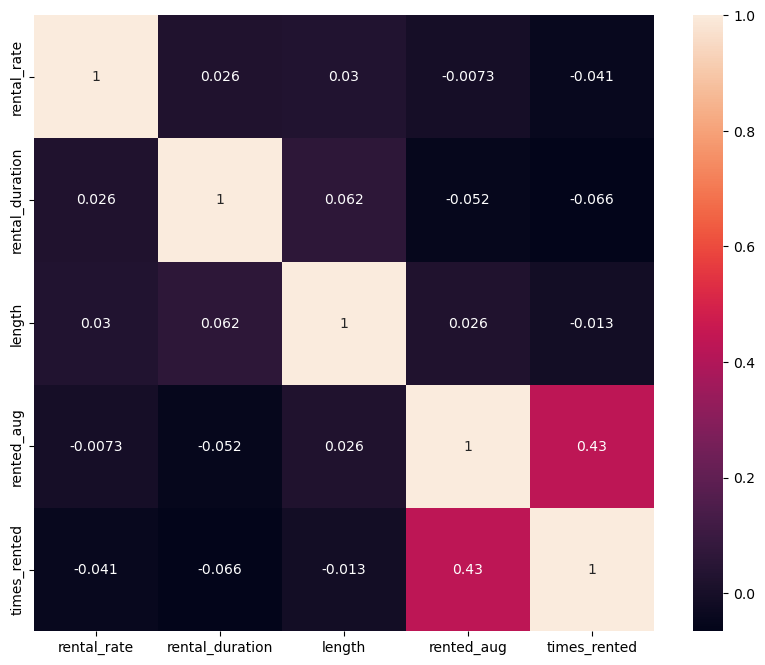

In [37]:

#there is no multicolinearity between the numerical values, so no need to drop
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=data_cpl.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()



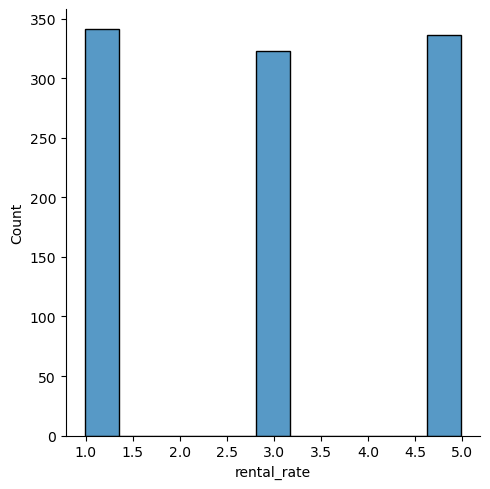

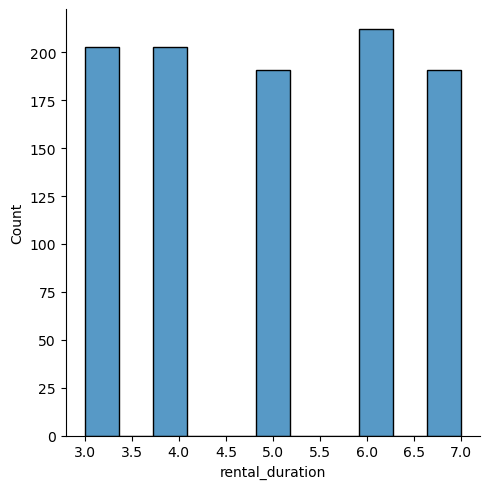

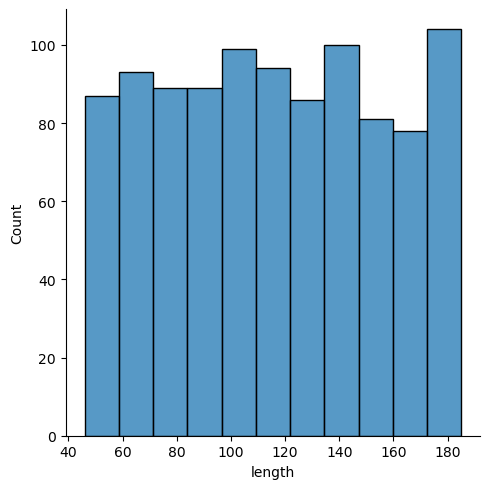

In [38]:

sns.displot(data_no_title['rental_rate'])
plt.show()

sns.displot(data_no_title['rental_duration'])
plt.show()

sns.displot(data_no_title['length'])
plt.show()

In [39]:

#making X-Y split
X = data_no_title.drop(['rented_aug'],axis=1)
y = data_no_title['rented_aug']


In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [41]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#cat/num X-train
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(object)

#cat/num X-test
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = np.object)

#Scale X-train
transformer = StandardScaler().fit(X_train_num)
X_scaled_train = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)

#Scale X-test
X_scaled_test = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)
X_scaled_test

/var/folders/q5/ywjsx89514x2b_9dvdlcfngw0000gn/T/ipykernel_2210/2347308970.py:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat = X_test.select_dtypes(include = np.object)


,rental_rate,rental_duration,length,times_rented
0,-0.019000,-0.719796,0.544084,-0.968570
1,-1.228093,-1.427460,1.567696,2.246387
2,-1.228093,1.403198,-0.854021,0.460300
3,1.190093,-0.012131,1.043407,-0.254135
4,1.190093,0.695533,-0.329732,1.531953
...,...,...,...,...
295,1.190093,1.403198,-1.727836,-0.611352
296,-0.019000,-1.427460,0.194558,0.103083
297,-1.228093,-1.427460,-0.779122,0.817518
298,1.190093,0.695533,-1.528107,-0.254135


In [42]:

from sklearn.preprocessing import OneHotEncoder
# Onehot encoding
encoder = OneHotEncoder().fit(X_train_cat)

# encode training data
train_encoded = encoder.transform(X_train_cat).toarray()

train_encoded_columns = list()
train_dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            train_dropped_columns.append(column)
            train_encoded_columns.append(column)
            condition = False
        else:
            train_encoded_columns.append(column)

train_cat_encoded = pd.DataFrame(data = train_encoded, columns=train_encoded_columns)
train_cat_encoded = train_cat_encoded.drop(columns = train_dropped_columns)
train_cat_encoded.head()

,NC-17,PG,PG-13,R,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:

test_encoded = encoder.transform(X_test_cat).toarray()

test_encoded_columns = list()
test_dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            test_dropped_columns.append(column)
            test_encoded_columns.append(column)
            condition = False
        else:
            test_encoded_columns.append(column)

test_cat_encoded = pd.DataFrame(data = test_encoded, columns=test_encoded_columns)
test_cat_encoded = test_cat_encoded.drop(columns = test_dropped_columns)
test_cat_encoded


,NC-17,PG,PG-13,R,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
297,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
298,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:

#merging the data and training set with encoded and normalized values and the dropped special_features
# Training data first
X_train_nrml = pd.concat([X_scaled_train,train_cat_encoded], axis = 1)
X_train_nrml


,rental_rate,rental_duration,length,times_rented,NC-17,PG,PG-13,R,Animation,Children,Classics,Comedy,Documentary,Drama,Family,Foreign,Games,Horror,Music,New,Sci-Fi,Sports,Travel
0,-0.019000,-1.427460,-1.578039,-0.611352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.019000,-0.012131,0.244490,-0.968570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.019000,-1.427460,1.392933,0.460300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.228093,1.403198,-1.153615,0.103083,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.190093,-0.719796,-1.528107,-1.325787,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.019000,-0.719796,-1.303411,-1.325787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
696,1.190093,-0.012131,0.818711,0.103083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697,1.190093,-1.427460,-0.105036,-0.254135,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
698,-1.228093,-0.719796,0.169592,0.817518,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:

#merging test data
X_test_nrml = pd.concat([X_scaled_test,test_cat_encoded], axis = 1)

In [46]:

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=10, solver='lbfgs').fit(X_train_nrml, y_train)



In [47]:


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

predictions = classification.predict(X_test_nrml)
classification.score(X_test_nrml, y_test)

print("precision: ",precision_score(y_test,predictions))
print("recall: ",recall_score(y_test,predictions))
print("f1: ",f1_score(y_test,predictions))


precision:  1.0
recall:  1.0
f1:  1.0


In [48]:

predictions



array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:

from sklearn.metrics import confusion_matrix
confusion_matrix(predictions,y_test)

array([[ 10,   0],
       [  0, 290]])

In [50]:
df_predictions = pd.concat([data_cpl,pd.Series(predictions)],axis=1).head()
df_predictions.head()



,film_title,rental_rate,rental_duration,length,rating,category,rented_aug,times_rented,0
0,ACADEMY DINOSAUR,0.99,6,86,PG,Documentary,1,9,1.0
1,ACE GOLDFINGER,4.99,3,48,G,Horror,1,4,1.0
2,ADAPTATION HOLES,2.99,7,50,NC-17,Documentary,1,6,1.0
3,AFFAIR PREJUDICE,2.99,5,117,G,Horror,1,6,1.0
4,AFRICAN EGG,2.99,6,130,G,Family,1,3,1.0


In [51]:

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='uniform')
clf.fit(X_train_nrml, y_train)
predictions_clf = clf.predict(X_test_nrml)
clf.score(X_test_nrml, y_test)


0.9733333333333334

In [52]:
confusion_matrix(predictions_clf,y_test)


array([[  2,   0],
       [  8, 290]])

In [53]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=10)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_nrml,y_train)

In [54]:

class_smote = LogisticRegression(random_state=10,solver='lbfgs').fit(X_train_nrml, y_train)
class_smote.score(X_test_nrml, y_test)


1.0

In [55]:
pred_smote = class_smote.predict(X_test_nrml)

print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

precision:  1.0
recall:  1.0
f1:  1.0
